### Importing drive and libraries

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:

train_path="/content/drive/MyDrive/Covid data/Train"
test_path="/content/drive/MyDrive/Covid data/Test"

### Preprocessing data

#### Preprocessing the training set

In [ ]:
train_datagen= image.ImageDataGenerator(
    rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2,
)

train_set=train_datagen.flow_from_directory(train_path,target_size=(256,256)
,batch_size=16,class_mode="binary")


Found 300 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'covid': 0, 'normal': 1}

#### Preprocessing the testing set

In [ ]:
test_datagen=image.ImageDataGenerator(
    rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2

)

test_set=test_datagen.flow_from_directory(test_path,target_size=(256,256)
,batch_size=16,class_mode="binary")

Found 92 images belonging to 2 classes.


#### Visualization of covid and normal images

printing these three images
NORMAL2-IM-1103-0001-0001.jpeg
NORMAL2-IM-0521-0001.jpeg
NORMAL2-IM-1149-0001.jpeg
/content/drive/MyDrive/Covid data/Train/normal/NORMAL2-IM-1103-0001-0001.jpeg


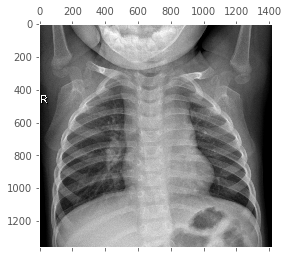

/content/drive/MyDrive/Covid data/Train/normal/NORMAL2-IM-0521-0001.jpeg


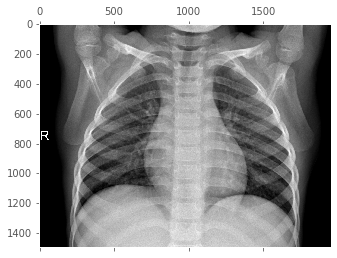

/content/drive/MyDrive/Covid data/Train/normal/NORMAL2-IM-1149-0001.jpeg


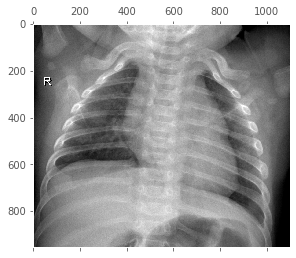

In [ ]:
import os,random
folder_n="/content/drive/MyDrive/Covid data/Train/normal"
a=random.choice(os.listdir(folder_n))
b=random.choice(os.listdir(folder_n))
c=random.choice(os.listdir(folder_n))
print("printing these three images")
print(a)
print(b)
print(c)

random_n=[a,b,c]
for img in random_n:
    file = folder_n+'/'+img
    print(file)
    img = image.load_img(file)
    plt.matshow(img)
    plt.grid(False)
    plt.show() 


printing these three images
12941_2020_358_Fig1_HTML.jpg
covid-19-pneumonia-14-PA.png
F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg
/content/drive/MyDrive/Covid data/Train/covid/12941_2020_358_Fig1_HTML.jpg


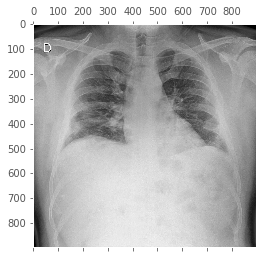

/content/drive/MyDrive/Covid data/Train/covid/covid-19-pneumonia-14-PA.png


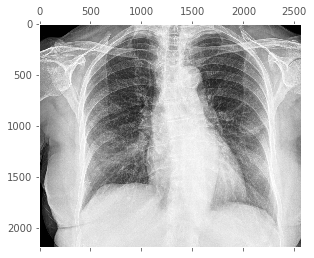

/content/drive/MyDrive/Covid data/Train/covid/F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg


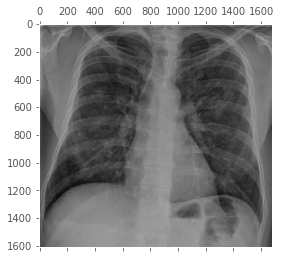

In [ ]:
folder_n="/content/drive/MyDrive/Covid data/Train/covid"
a=random.choice(os.listdir(folder_n))
b=random.choice(os.listdir(folder_n))
c=random.choice(os.listdir(folder_n))
print("printing these three images")
print(a)
print(b)
print(c)

random_n=[a,b,c]
for img in random_n:
    file = folder_n+'/'+img
    print(file)
    img = image.load_img(file)
    plt.matshow(img)
    plt.grid(False)
    plt.show() 

### 2.Building the CNN



#### Intialising the layer

In [ ]:
model=Sequential()

#### Add convolution layer

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(rate=0.25))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(rate=0.25))

#### Flattening 

In [ ]:
model.add(Flatten())

#### Full connection

In [ ]:
model.add(tf.keras.layers.Dense(units=64,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))

#### Output layer

In [ ]:
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

### 3.Training the CNN

#### Compiling the CNN

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 62, 62, 64)       

#### Training the CNN on train set and evaluating on test set

In [ ]:
history=model.fit(x=train_set,steps_per_epoch=8,epochs=25,
         validation_steps=2,validation_data=test_set)

Epoch 1/25
8/8 [==============================] - 8s 895ms/step - loss: 0.9677 - accuracy: 0.5484 - val_loss: 0.6904 - val_accuracy: 0.6875
Epoch 2/25
8/8 [==============================] - 6s 833ms/step - loss: 0.6515 - accuracy: 0.6797 - val_loss: 0.6253 - val_accuracy: 0.7812
Epoch 3/25
8/8 [==============================] - 6s 866ms/step - loss: 0.5324 - accuracy: 0.7581 - val_loss: 0.4687 - val_accuracy: 0.8125
Epoch 4/25
8/8 [==============================] - 7s 914ms/step - loss: 0.3027 - accuracy: 0.8828 - val_loss: 0.2404 - val_accuracy: 0.8750
Epoch 5/25
8/8 [==============================] - 6s 835ms/step - loss: 0.3373 - accuracy: 0.8516 - val_loss: 0.0741 - val_accuracy: 1.0000
Epoch 6/25
8/8 [==============================] - 7s 833ms/step - loss: 0.3272 - accuracy: 0.8984 - val_loss: 0.2668 - val_accuracy: 0.9688
Epoch 7/25
8/8 [==============================] - 7s 855ms/step - loss: 0.2921 - accuracy: 0.9032 - val_loss: 0.2745 - val_accuracy: 0.9375
Epoch 8/25
8/8 [====

### 4.Visualizatin of loss and accuracy 

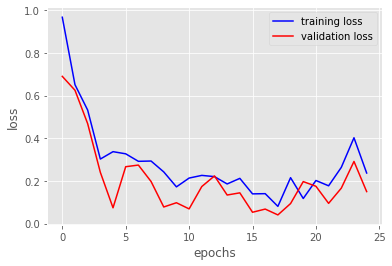

In [ ]:
plt.plot(history.history["loss"],"r",label="training loss",color="blue")
plt.plot(history.history["val_loss"],label="validation loss",color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

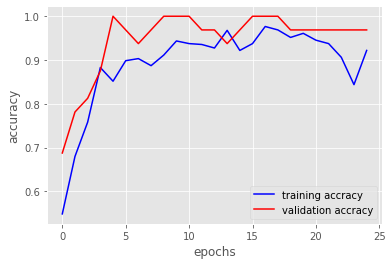

In [ ]:
plt.plot(history.history["accuracy"],"r",label="training accracy",color="blue")
plt.plot(history.history["val_accuracy"],label="validation accracy",color="red")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()